# 머신러닝 모델링

## 라이브러리 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder
from eli5.sklearn import PermutationImportance
from ipywidgets import interact, fixed
from scipy.stats import randint, uniform
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, accuracy_score, classification_report, confusion_matrix, f1_score, plot_confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder
from category_encoders import OneHotEncoder, OrdinalEncoder, TargetEncoder

In [2]:
## 한글깨짐

import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
pd.set_option('display.max_seq_items', None)
# # row 생략 없이 출력

pd.set_option('display.max_columns', None)
# # col 생략 없이 출력

# pd.set_option('display.max_columns', None)

## 데이터 불러오기

In [4]:
df = pd.read_csv("./sql_db/data/dataset_p3.csv", encoding = 'euc-kr')

In [5]:
df

,loc,year,month,unemployment,kospi,interest,rate,oilprice,productprice,consumerprice
0,서울특별시,2010,1,313,1682.157500,2.00,1139.803810,76.713810,96.71,85.351
1,서울특별시,2010,2,305,1598.956316,2.00,1155.737500,73.553500,96.88,85.523
2,서울특별시,2010,3,273,1665.504091,2.00,1136.630870,77.367826,97.33,85.696
3,서울특별시,2010,4,270,1730.286818,2.00,1116.079545,82.984091,98.04,86.041
4,서울특별시,2010,5,224,1648.300000,2.00,1166.815238,76.620000,98.87,86.128
...,...,...,...,...,...,...,...,...,...,...
2511,제주도,2021,12,17,2988.494091,1.00,1184.020435,73.190000,113.21,104.040
2512,제주도,2022,1,13,2865.552000,1.25,1195.540000,83.450000,114.40,104.690
2513,제주도,2022,2,9,2724.015000,1.25,1197.633000,92.340000,114.95,105.300
2514,제주도,2022,3,8,2698.716190,1.25,1220.226522,110.890000,116.70,106.060


## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loc            2516 non-null   object 
 1   year           2516 non-null   int64  
 2   month          2516 non-null   int64  
 3   unemployment   2516 non-null   int64  
 4   kospi          2516 non-null   float64
 5   interest       2516 non-null   float64
 6   rate           2516 non-null   float64
 7   oilprice       2516 non-null   float64
 8   productprice   2516 non-null   float64
 9   consumerprice  2516 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 196.7+ KB


In [7]:
df.describe()

,year,month,unemployment,kospi,interest,rate,oilprice,productprice,consumerprice
count,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,2015.675676,6.391892,57.121622,2157.614070,1.815878,1131.449611,74.301695,103.634392,95.661365
std,3.565204,3.471875,71.221065,362.187357,0.806785,46.728685,25.245334,3.866687,4.742578
min,2010.000000,1.000000,0.000000,1598.956316,0.500000,1019.236667,23.376818,96.710000,85.351000
25%,2013.000000,3.000000,19.000000,1947.224030,1.250000,1101.809727,54.120393,101.147500,92.723500
50%,2016.000000,6.000000,31.000000,2032.853869,1.500000,1130.847500,71.508903,103.515000,95.412000
75%,2019.000000,9.000000,58.250000,2283.911022,2.500000,1166.352179,102.933043,105.102500,99.445500
max,2022.000000,12.000000,364.000000,3259.140000,3.250000,1236.802381,122.275909,118.020000,106.850000


In [8]:
for i in list(df.columns): 
     print(df[i].value_counts(),"\n")

서울특별시      148
강원도        148
경상남도       148
경상북도       148
전라남도       148
전라북도       148
충청남도       148
충청북도       148
경기도        148
부산광역시      148
세종특별자치시    148
울산광역시      148
대전광역시      148
광주광역시      148
인천광역시      148
대구광역시      148
제주도        148
Name: loc, dtype: int64 

2010    204
2011    204
2012    204
2013    204
2014    204
2015    204
2016    204
2017    204
2018    204
2019    204
2020    204
2021    204
2022     68
Name: year, dtype: int64 

1     221
2     221
3     221
4     221
5     204
6     204
7     204
8     204
9     204
10    204
11    204
12    204
Name: month, dtype: int64 

0      84
22     73
18     70
20     61
19     60
       ..
260     1
164     1
187     1
183     1
103     1
Name: unemployment, Length: 230, dtype: int64 

1682.157500    17
2482.871250    17
2467.725789    17
2520.937727    17
2439.104444    17
               ..
1937.733000    17
1952.429524    17
1991.191364    17
1994.134737    17
2703.242857    17
Name: kospi, Length: 148, dtype:

<AxesSubplot:ylabel='Frequency'>

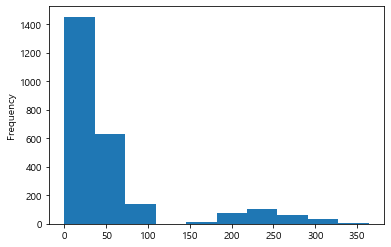

In [9]:
df['unemployment'].plot(kind='hist')

In [10]:
df.groupby('loc')['unemployment'].mean()

loc
강원도         23.250000
경기도        242.966216
경상남도        51.527027
경상북도        46.648649
광주광역시       24.351351
대구광역시       47.668919
대전광역시       28.304054
부산광역시       67.060811
서울특별시      237.378378
세종특별자치시      1.763514
울산광역시       19.736486
인천광역시       71.000000
전라남도        24.229730
전라북도        21.398649
제주도          7.371622
충청남도        34.594595
충청북도        21.817568
Name: unemployment, dtype: float64

<AxesSubplot:>

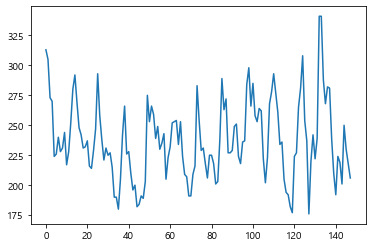

In [11]:
df.loc[df['loc'] == "서울특별시"]['unemployment'].plot(kind = "line")

<Figure size 1440x1440 with 0 Axes>

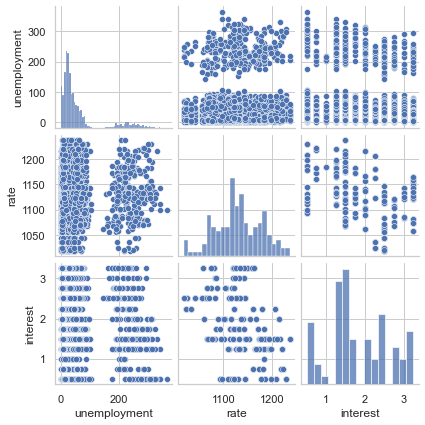

In [12]:
plt.figure(figsize =(20, 20))
sns.set(style='whitegrid', context='notebook')
cols = ['unemployment', 'rate', 'interest']
sns.pairplot(df[cols], height=2);

<AxesSubplot:xlabel='kospi', ylabel='unemployment'>

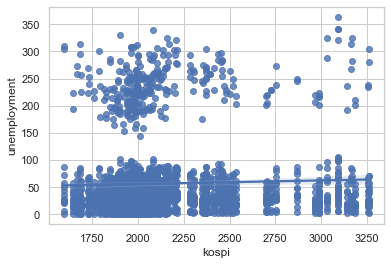

In [13]:
sns.regplot(x=df['kospi'], y=df['unemployment'])

<AxesSubplot:xlabel='rate', ylabel='unemployment'>

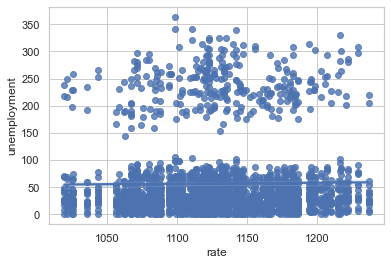

In [14]:
sns.regplot(x=df['rate'], y=df['unemployment'])

<AxesSubplot:xlabel='oilprice', ylabel='unemployment'>

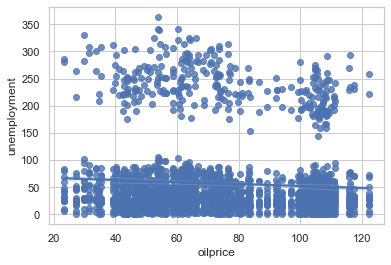

In [15]:
sns.regplot(x=df['oilprice'], y=df['unemployment'])

<AxesSubplot:xlabel='consumerprice', ylabel='unemployment'>

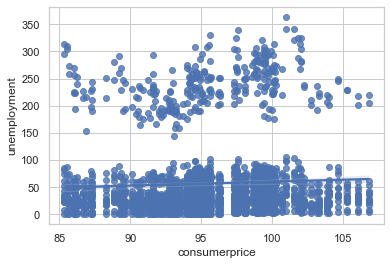

In [16]:
sns.regplot(x=df['consumerprice'], y=df['unemployment'])

<AxesSubplot:xlabel='productprice', ylabel='unemployment'>

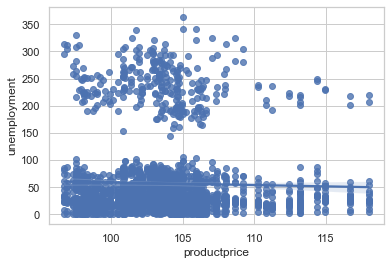

In [17]:
sns.regplot(x=df['productprice'], y=df['unemployment'])

<AxesSubplot:xlabel='kospi', ylabel='unemployment'>

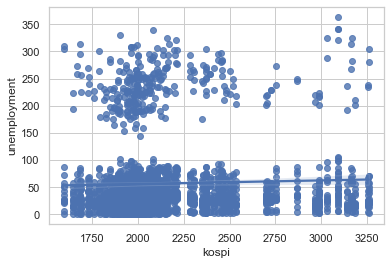

In [18]:
sns.regplot(x=df['kospi'], y=df['unemployment'])

## 머신러닝 모델링

In [19]:
df.rename(columns = {'loc':'location'}, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       2516 non-null   object 
 1   year           2516 non-null   int64  
 2   month          2516 non-null   int64  
 3   unemployment   2516 non-null   int64  
 4   kospi          2516 non-null   float64
 5   interest       2516 non-null   float64
 6   rate           2516 non-null   float64
 7   oilprice       2516 non-null   float64
 8   productprice   2516 non-null   float64
 9   consumerprice  2516 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 196.7+ KB


In [21]:
# 명목형 데이터 str로 바꾸기

df['location'] = df['location'].astype(str)
df['month'] = df['month'].astype(str)

In [22]:
# + 추가 전처리: 연도 제외

df = df.drop('year', axis = 1)
df

,location,month,unemployment,kospi,interest,rate,oilprice,productprice,consumerprice
0,서울특별시,1,313,1682.157500,2.00,1139.803810,76.713810,96.71,85.351
1,서울특별시,2,305,1598.956316,2.00,1155.737500,73.553500,96.88,85.523
2,서울특별시,3,273,1665.504091,2.00,1136.630870,77.367826,97.33,85.696
3,서울특별시,4,270,1730.286818,2.00,1116.079545,82.984091,98.04,86.041
4,서울특별시,5,224,1648.300000,2.00,1166.815238,76.620000,98.87,86.128
...,...,...,...,...,...,...,...,...,...
2511,제주도,12,17,2988.494091,1.00,1184.020435,73.190000,113.21,104.040
2512,제주도,1,13,2865.552000,1.25,1195.540000,83.450000,114.40,104.690
2513,제주도,2,9,2724.015000,1.25,1197.633000,92.340000,114.95,105.300
2514,제주도,3,8,2698.716190,1.25,1220.226522,110.890000,116.70,106.060


In [23]:
target = 'unemployment'
features = df.columns.drop(target)

In [24]:
df_target = df[target]
df_features = df[features]

In [25]:
df_features

,location,month,kospi,interest,rate,oilprice,productprice,consumerprice
0,서울특별시,1,1682.157500,2.00,1139.803810,76.713810,96.71,85.351
1,서울특별시,2,1598.956316,2.00,1155.737500,73.553500,96.88,85.523
2,서울특별시,3,1665.504091,2.00,1136.630870,77.367826,97.33,85.696
3,서울특별시,4,1730.286818,2.00,1116.079545,82.984091,98.04,86.041
4,서울특별시,5,1648.300000,2.00,1166.815238,76.620000,98.87,86.128
...,...,...,...,...,...,...,...,...
2511,제주도,12,2988.494091,1.00,1184.020435,73.190000,113.21,104.040
2512,제주도,1,2865.552000,1.25,1195.540000,83.450000,114.40,104.690
2513,제주도,2,2724.015000,1.25,1197.633000,92.340000,114.95,105.300
2514,제주도,3,2698.716190,1.25,1220.226522,110.890000,116.70,106.060


### 원핫인코딩

In [26]:
## fit 시킨 encoder도 pickling 해야함.
encoder = OneHotEncoder(use_cat_names = True)

In [27]:
encoder.fit_transform(df_features)

,location_서울특별시,location_부산광역시,location_대구광역시,location_인천광역시,location_광주광역시,location_대전광역시,location_울산광역시,location_세종특별자치시,location_경기도,location_강원도,location_충청북도,location_충청남도,location_전라북도,location_전라남도,location_경상북도,location_경상남도,location_제주도,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,kospi,interest,rate,oilprice,productprice,consumerprice
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1682.157500,2.00,1139.803810,76.713810,96.71,85.351
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1598.956316,2.00,1155.737500,73.553500,96.88,85.523
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1665.504091,2.00,1136.630870,77.367826,97.33,85.696
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1730.286818,2.00,1116.079545,82.984091,98.04,86.041
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1648.300000,2.00,1166.815238,76.620000,98.87,86.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2988.494091,1.00,1184.020435,73.190000,113.21,104.040
2512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2865.552000,1.25,1195.540000,83.450000,114.40,104.690
2513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2724.015000,1.25,1197.633000,92.340000,114.95,105.300
2514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2698.716190,1.25,1220.226522,110.890000,116.70,106.060


In [28]:
df_features = encoder.fit_transform(df_features)
df_features

,location_서울특별시,location_부산광역시,location_대구광역시,location_인천광역시,location_광주광역시,location_대전광역시,location_울산광역시,location_세종특별자치시,location_경기도,location_강원도,location_충청북도,location_충청남도,location_전라북도,location_전라남도,location_경상북도,location_경상남도,location_제주도,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,kospi,interest,rate,oilprice,productprice,consumerprice
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1682.157500,2.00,1139.803810,76.713810,96.71,85.351
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1598.956316,2.00,1155.737500,73.553500,96.88,85.523
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1665.504091,2.00,1136.630870,77.367826,97.33,85.696
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1730.286818,2.00,1116.079545,82.984091,98.04,86.041
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1648.300000,2.00,1166.815238,76.620000,98.87,86.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2988.494091,1.00,1184.020435,73.190000,113.21,104.040
2512,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2865.552000,1.25,1195.540000,83.450000,114.40,104.690
2513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,2724.015000,1.25,1197.633000,92.340000,114.95,105.300
2514,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2698.716190,1.25,1220.226522,110.890000,116.70,106.060


인코더 성능 테스트

In [29]:
## 인코딩은 데이터 프레임 형태로 입력해야 작동함.

testlist = ["서울특별시", '4', 2703.24, 1.5, 1236.8, 102.8, 118, 106]
test1 = pd.DataFrame([testlist], columns = ['location', 'month', 'kospi', 'interest', 'rate', 'oilprice', 'productprice', 'consumerprice']) 
test1

,location,month,kospi,interest,rate,oilprice,productprice,consumerprice
0,서울특별시,4,2703.24,1.5,1236.8,102.8,118,106


In [30]:
test2= encoder.transform(test1)
test2

,location_서울특별시,location_부산광역시,location_대구광역시,location_인천광역시,location_광주광역시,location_대전광역시,location_울산광역시,location_세종특별자치시,location_경기도,location_강원도,location_충청북도,location_충청남도,location_전라북도,location_전라남도,location_경상북도,location_경상남도,location_제주도,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,kospi,interest,rate,oilprice,productprice,consumerprice
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2703.24,1.5,1236.8,102.8,118,106


In [31]:
test1.columns

Index(['location', 'month', 'kospi', 'interest', 'rate', 'oilprice',
       'productprice', 'consumerprice'],
      dtype='object')

In [32]:
test2.columns

Index(['location_서울특별시', 'location_부산광역시', 'location_대구광역시', 'location_인천광역시',
       'location_광주광역시', 'location_대전광역시', 'location_울산광역시',
       'location_세종특별자치시', 'location_경기도', 'location_강원도', 'location_충청북도',
       'location_충청남도', 'location_전라북도', 'location_전라남도', 'location_경상북도',
       'location_경상남도', 'location_제주도', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'kospi', 'interest', 'rate',
       'oilprice', 'productprice', 'consumerprice'],
      dtype='object')

### train/test set 분리

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=30)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1761, 35), (755, 35), (1761,), (755,))

## 선형회귀 모델(기본모델)

In [35]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [36]:
print("r2스코어 :", r2_score(y_test, y_pred), "\nMAE : ", mean_absolute_error(y_test, y_pred), "\nMSE : ", mean_squared_error(y_test, y_pred))

r2스코어 : 0.9582387605931657 
MAE :  8.373549808729564 
MSE :  173.10401107028778


## LightGBM 회귀모델

### 하이퍼파라메터 튜닝 없이 성능 점검

In [37]:
import lightgbm as lgb

In [38]:
lgbm = lgb.LGBMRegressor()

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [39]:
print("r2스코어 :", r2_score(y_test, y_pred), "\nMAE : ", mean_absolute_error(y_test, y_pred), "\nMSE : ", mean_squared_error(y_test, y_pred))

r2스코어 : 0.971295759035935 
MAE :  6.422815059568099 
MSE :  118.98160390312921


### RandomizedSearchCV

    ## LightGBM 파라메터 목록 ##
    
    boosting_type: str = 'gbdt',
    num_leaves: int = 31,
    max_depth: int = -1,
    learning_rate: float = 0.1,
    n_estimators: int = 100,
    subsample_for_bin: int = 200000,
    objective: Union[str, Callable, NoneType] = None,
    class_weight: Union[Dict, str, NoneType] = None,
    min_split_gain: float = 0.0,
    min_child_weight: float = 0.001,
    min_child_samples: int = 20,
    subsample: float = 1.0,
    subsample_freq: int = 0,
    colsample_bytree: float = 1.0,
    reg_alpha: float = 0.0,
    reg_lambda: float = 0.0,
    random_state: Union[int, numpy.random.mtrand.RandomState, NoneType] = None,
    n_jobs: int = -1,
    silent: Union[bool, str] = 'warn',
    importance_type: str = 'split',

In [40]:
pipe = make_pipeline(
    lgb.LGBMRegressor(n_jobs=-1))

dists = {
    'lgbmregressor__max_depth' : [6,7,8,9,10,12,14],
    'lgbmregressor__n_estimators' : [100, 120, 150, 200],
    'lgbmregressor__n_estimators' : [100, 120, 130, 140],
    'lgbmregressor__learning_rate': [ 0.01, 0.1, 0.2, 0.3]
    
}
    
clf = RandomizedSearchCV(
    pipe,
    param_distributions=dists,
    n_iter = 500,
    cv = 5,
    scoring = 'neg_mean_absolute_error',
    verbose = 3,
    random_state = 42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
[CV 1/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=100;, score=-21.734 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=100;, score=-22.364 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=100;, score=-21.554 total time=   0.0s


C:\Users\leech\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 112 is smaller than n_iter=500. Running 112 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 4/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=100;, score=-20.872 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=100;, score=-20.824 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=120;, score=-18.799 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=120;, score=-19.547 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=120;, score=-18.523 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=120;, score=-18.125 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=120;, score=-17.952 total time=   0.0s

[CV 3/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=100;, score=-19.983 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=100;, score=-19.482 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=100;, score=-19.285 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=120;, score=-17.503 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=120;, score=-18.148 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=120;, score=-16.952 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=120;, score=-16.682 total time=   0.0s

[CV 2/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=100;, score=-20.916 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=100;, score=-19.730 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=100;, score=-19.024 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=100;, score=-18.828 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=120;, score=-17.237 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=120;, score=-17.939 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=120;, score=-16.599 total time=

[CV 2/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=100;, score=-7.046 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=100;, score=-6.449 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=100;, score=-6.227 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=100;, score=-6.575 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=120;, score=-6.963 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=120;, score=-7.002 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=120;, score=-6.331 total time=   0.0s
[CV 4/5] END 

[CV 5/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=10, lgbmregressor__n_estimators=140;, score=-6.298 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=100;, score=-7.090 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=100;, score=-7.048 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=100;, score=-6.442 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=100;, score=-6.339 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=100;, score=-6.632 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=120;, score=-7.084 total time=   0.0s
[CV 2/

[CV 2/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=140;, score=-6.661 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=140;, score=-6.223 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=140;, score=-6.108 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=140;, score=-6.337 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=7, lgbmregressor__n_estimators=100;, score=-7.107 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=7, lgbmregressor__n_estimators=100;, score=-6.838 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=7, lgbmregressor__n_estimators=100;, score=-6.186 total time=   0.0s
[CV 4/5] END 

[CV 2/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=140;, score=-6.609 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=140;, score=-6.141 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=140;, score=-6.126 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=140;, score=-6.285 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=10, lgbmregressor__n_estimators=100;, score=-6.724 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=10, lgbmregressor__n_estimators=100;, score=-6.768 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=10, lgbmregressor__n_estimators=100;, score=-6.274 total time=   0.0s
[CV 4/5] E

[CV 2/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=140;, score=-6.577 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=140;, score=-6.034 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=140;, score=-6.063 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.2, lgbmregressor__max_depth=14, lgbmregressor__n_estimators=140;, score=-6.415 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=100;, score=-7.258 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=100;, score=-6.746 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=6, lgbmregressor__n_estimators=100;, score=-6.292 total time=   0.0s
[CV 4/5] 

[CV 1/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=140;, score=-6.840 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=140;, score=-6.652 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=140;, score=-6.181 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=140;, score=-6.071 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=8, lgbmregressor__n_estimators=140;, score=-6.309 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=100;, score=-6.813 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=9, lgbmregressor__n_estimators=100;, score=-6.774 total time=   0.0s
[CV 3/5] END 

[CV 4/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=130;, score=-6.178 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=130;, score=-6.265 total time=   0.0s
[CV 1/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=140;, score=-6.962 total time=   0.0s
[CV 2/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=140;, score=-6.691 total time=   0.0s
[CV 3/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=140;, score=-6.118 total time=   0.0s
[CV 4/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=140;, score=-6.156 total time=   0.0s
[CV 5/5] END lgbmregressor__learning_rate=0.3, lgbmregressor__max_depth=12, lgbmregressor__n_estimators=140;, score=-6.282 total time=   0.0s
[CV 1/

In [41]:
print("best estimator :", clf.best_estimator_, "\nbest score :", clf.best_score_)

best estimator : Pipeline(steps=[('lgbmregressor',
                 LGBMRegressor(learning_rate=0.2, max_depth=9,
                               n_estimators=140))]) 
best score : -6.3797359623319645


In [42]:
print("r2스코어 :", r2_score(y_test, y_pred), "\nMAE : ", mean_absolute_error(y_test, y_pred), "\nMSE : ", mean_squared_error(y_test, y_pred))

r2스코어 : 0.9735545392385075 
MAE :  6.158848250599348 
MSE :  109.618761258965


## 모델 해석

In [43]:
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMRegressor, plot_importance

### feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anacond

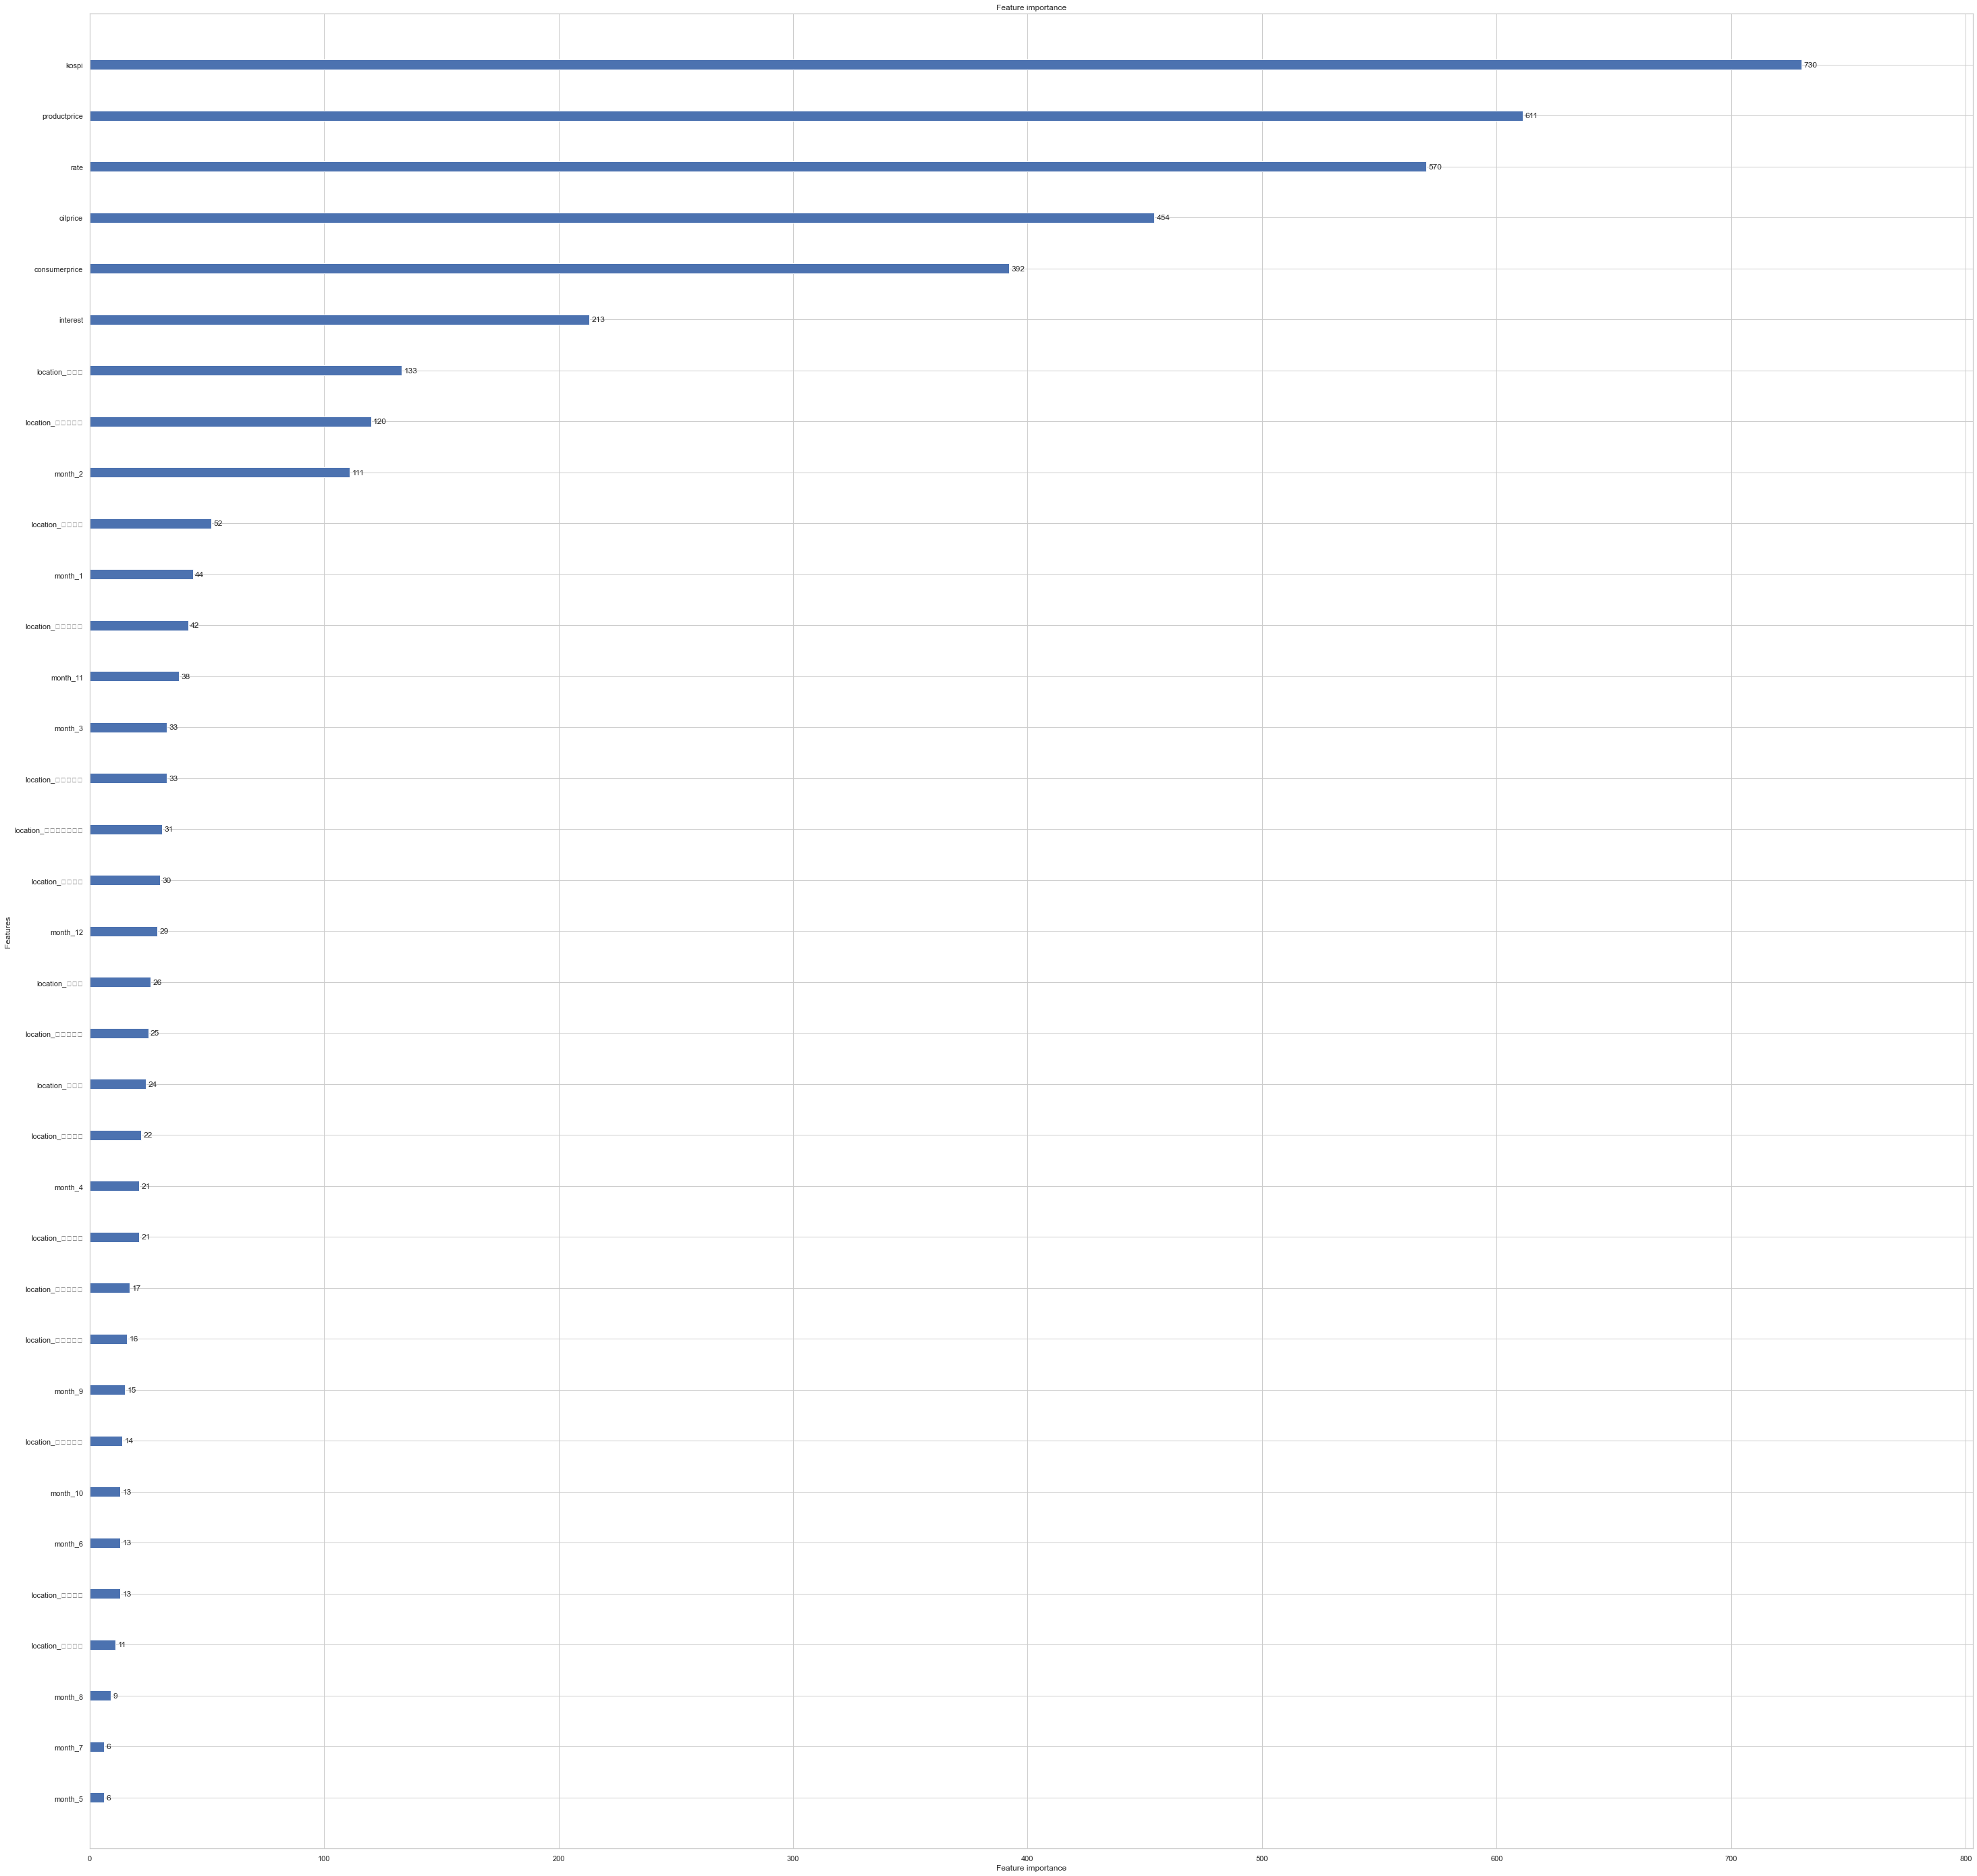

In [44]:
fig, ax = plt.subplots(figsize=(50,50))
plot_importance(clf.best_estimator_['lgbmregressor'], ax = ax)

In [45]:
permuter = PermutationImportance(
    clf,
    scoring='neg_mean_squared_error',
    n_iter=5, 
    random_state=2)

perm = permuter.fit(X_test, y_test)

eli5.show_weights(perm, top = 20, feature_names = X_test.columns.to_list())

Weight,Feature
4074.1878 ± 555.2316,location_경기도
3975.4014 ± 275.2632,location_서울특별시
209.8250 ± 14.4443,location_인천광역시
182.8490 ± 12.6776,location_부산광역시
78.9174 ± 6.9817,location_경상남도
54.7963 ± 11.1543,location_세종특별자치시
49.3836 ± 20.6404,oilprice
46.8113 ± 5.4320,location_대구광역시
46.1236 ± 3.1317,location_경상북도
42.6441 ± 15.9288,consumerprice


In [46]:
pd.Series(permuter.feature_importances_, X_train.columns).sort_values(ascending=False)

location_경기도        4074.187791
location_서울특별시      3975.401429
location_인천광역시       209.825038
location_부산광역시       182.848951
location_경상남도         78.917373
location_세종특별자치시      54.796251
oilprice              49.383590
location_대구광역시        46.811287
location_경상북도         46.123604
consumerprice         42.644120
location_제주도          29.550687
month_2               28.121229
rate                  27.925569
productprice          22.859457
month_11              14.841733
kospi                 13.568244
location_충청남도          9.254873
month_3                6.584475
month_12               5.018676
month_1                4.048709
location_울산광역시         3.938484
interest               3.870338
month_4                2.726421
month_10               2.525402
month_9                2.492791
month_8                1.666514
location_충청북도          1.621127
location_전라북도          1.575599
location_강원도           1.384339
location_전라남도          1.200151
location_대전광역시         1.070809
location

In [47]:
ft_importance_values = clf.best_estimator_['lgbmregressor'].feature_importances_
pd.Series(ft_importance_values, index = X_train.columns).sort_values(ascending = False)

kospi               730
productprice        611
rate                570
oilprice            454
consumerprice       392
interest            213
location_경기도        133
location_서울특별시      120
month_2             111
location_경상북도        52
month_1              44
location_부산광역시       42
month_11             38
location_인천광역시       33
month_3              33
location_세종특별자치시     31
location_경상남도        30
month_12             29
location_강원도         26
location_대구광역시       25
location_제주도         24
location_충청남도        22
location_전라남도        21
month_4              21
location_광주광역시       17
location_울산광역시       16
month_9              15
location_대전광역시       14
month_10             13
month_6              13
location_전라북도        13
location_충청북도        11
month_8               9
month_7               6
month_5               6
dtype: int32

C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leech\anaconda3\

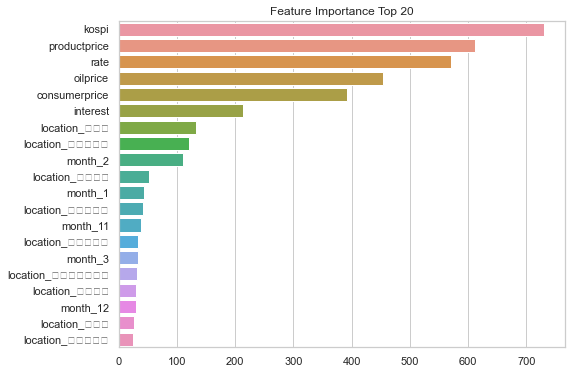

In [48]:
ft_importance_values = clf.best_estimator_['lgbmregressor'].feature_importances_

# 정렬과 시각화를 쉽게 하기 위해 series 전환

ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

# 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)

plt.show()

### shap value

In [49]:
!pip install shap

In [50]:
import shap

#### shap summary plot

Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
Glyph 51333 (\N{HANGU

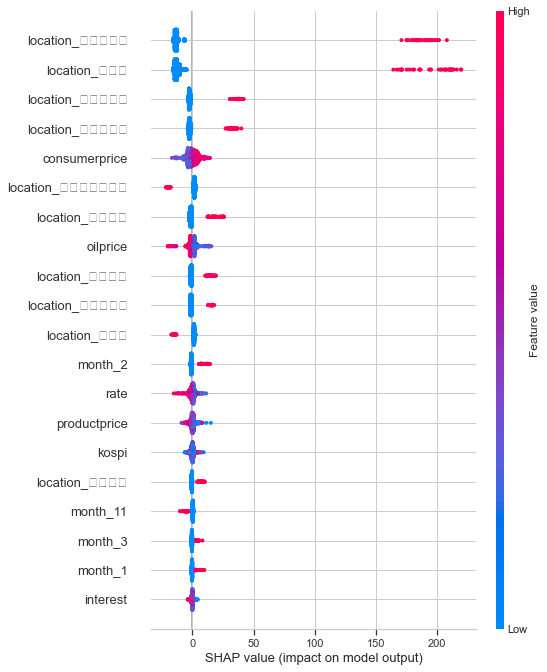

In [51]:
explainer = shap.TreeExplainer(clf.best_estimator_['lgbmregressor'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

#### shap decision plot

In [52]:
row = X_test.iloc[[333]]
row

,location_서울특별시,location_부산광역시,location_대구광역시,location_인천광역시,location_광주광역시,location_대전광역시,location_울산광역시,location_세종특별자치시,location_경기도,location_강원도,location_충청북도,location_충청남도,location_전라북도,location_전라남도,location_경상북도,location_경상남도,location_제주도,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,kospi,interest,rate,oilprice,productprice,consumerprice
2436,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1939.5825,1.5,1186.573182,46.144545,99.39,94.966


In [53]:
y_test.iloc[333]

5

Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
Glyph 44396 (\N{HAN

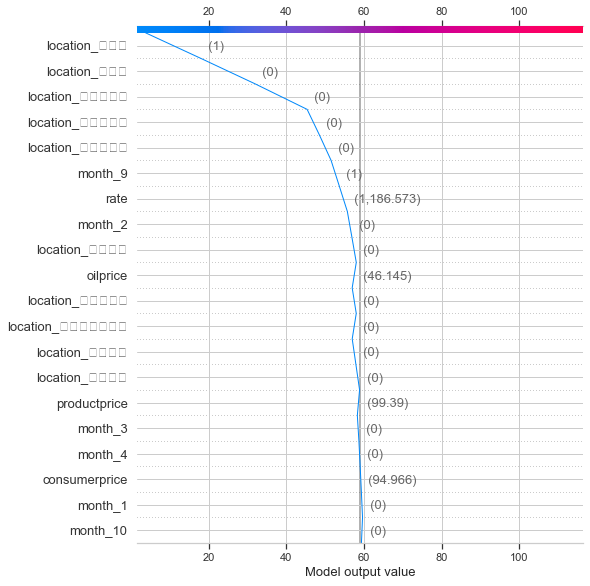

In [54]:
explainer = shap.TreeExplainer(clf.best_estimator_['lgbmregressor'])
shap_values = explainer.shap_values(row)

shap.initjs()
shap.decision_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row)

In [55]:
row = X_test.iloc[[21]]
row

,location_서울특별시,location_부산광역시,location_대구광역시,location_인천광역시,location_광주광역시,location_대전광역시,location_울산광역시,location_세종특별자치시,location_경기도,location_강원도,location_충청북도,location_충청남도,location_전라북도,location_전라남도,location_경상북도,location_경상남도,location_제주도,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,kospi,interest,rate,oilprice,productprice,consumerprice
1474,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2964.301818,1.0,1184.113636,79.798182,113.23,103.87


In [56]:
y_test.iloc[21]

16

Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
Glyph 52397 (\N{HANGUL SYLLABLE CEONG}) missing from current font.
Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from current font.
Glyph 49884 (\N{H

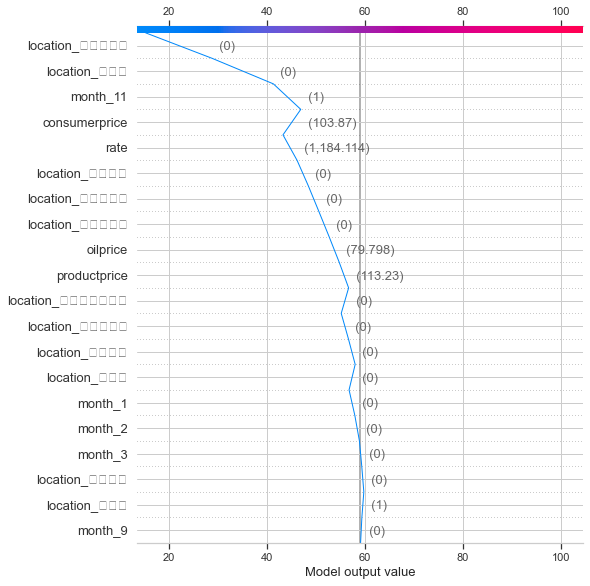

In [57]:
explainer = shap.TreeExplainer(clf.best_estimator_['lgbmregressor'])
shap_values = explainer.shap_values(row)

shap.initjs()
shap.decision_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row)

### 실제 수치 : 모델이 예측한 수치 비교

In [58]:
df_pre = pd.DataFrame(y_pred)
df_pre['실제'] = pd.DataFrame(y_test).reset_index(drop=True)

In [59]:
df_pre = df_pre.rename(columns={0:"예측"})

In [60]:
df_pre

,예측,실제
0,40.542139,39
1,33.869289,35
2,67.747222,70
3,19.516166,16
4,30.856922,38
...,...,...
750,35.859072,28
751,18.719544,21
752,37.909064,33
753,43.554627,37


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


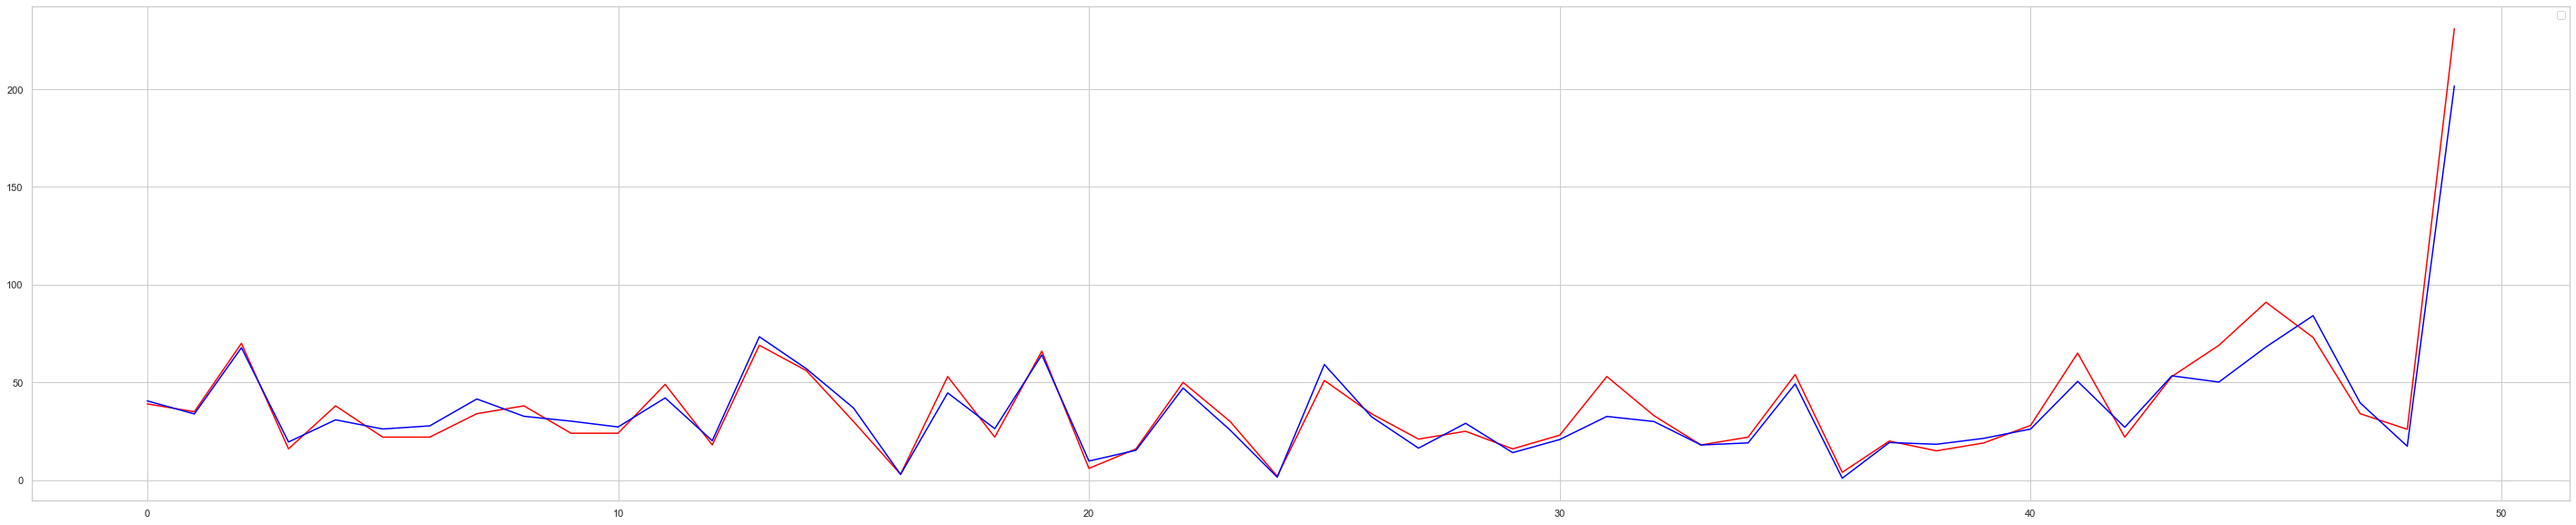

In [61]:
plt.figure(figsize=(50, 10))
plt.plot(df_pre['실제'].iloc[:50], color='red')
plt.plot(df_pre['예측'].iloc[:50], color='blue')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


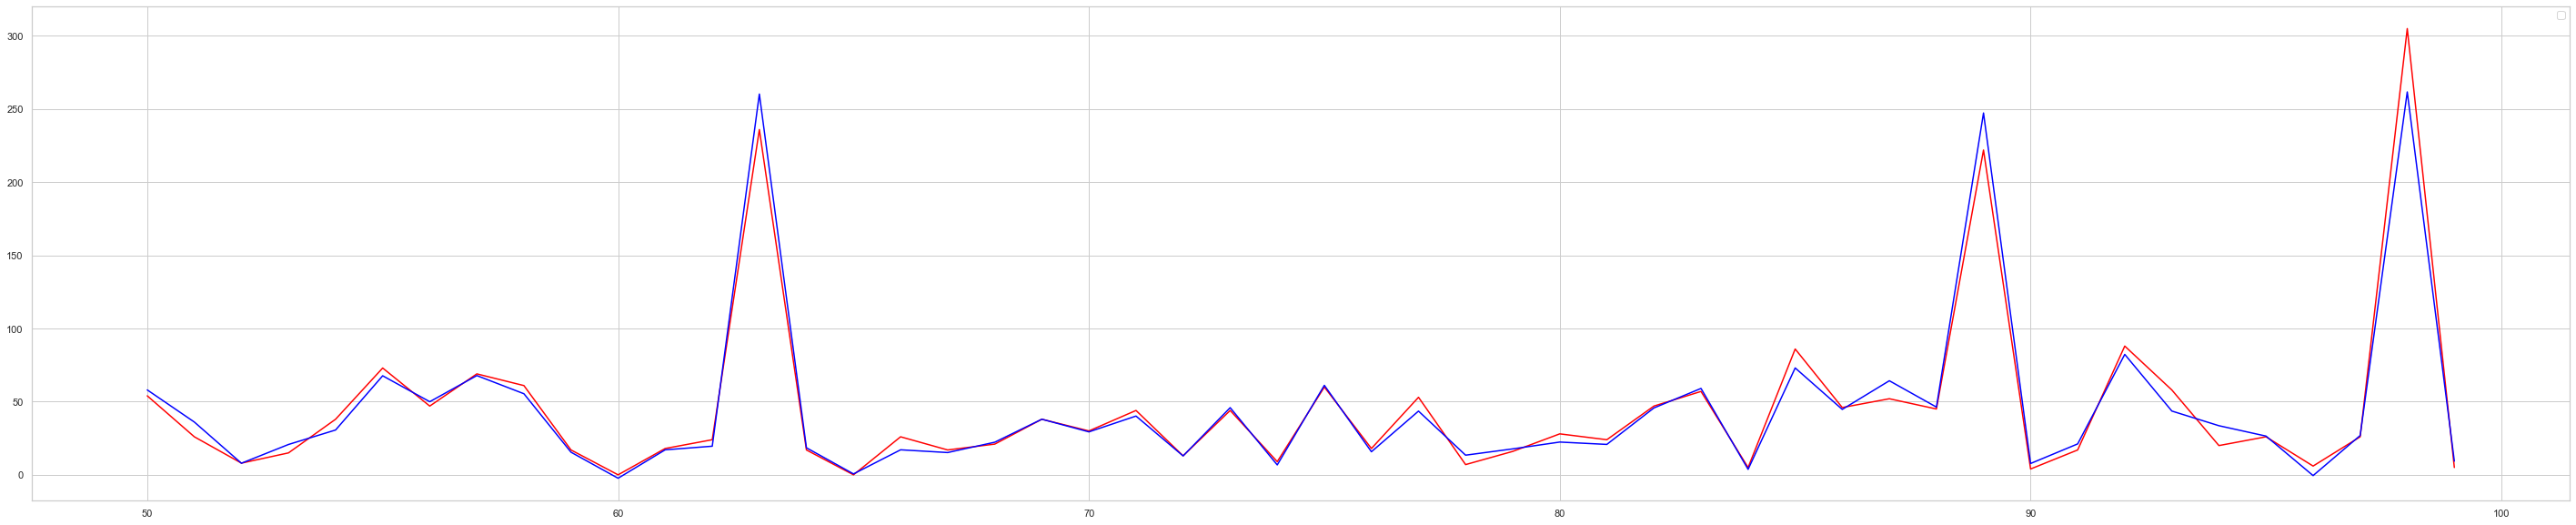

In [62]:
plt.figure(figsize=(50, 10))
plt.plot(df_pre['실제'].iloc[50:100], color='red')
plt.plot(df_pre['예측'].iloc[50:100], color='blue')
plt.legend()

In [63]:
df_pre.tail(50)

,예측,실제
705,269.644738,234
706,18.914681,22
707,15.382153,14
708,1.787052,0
709,273.887717,243
710,69.729252,76
711,28.299947,21
712,245.172724,249
713,38.927997,39
714,15.401289,14


# bokeh 시각화 및 html로 내보내기

In [64]:
!pip install bokeh

In [65]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [66]:
p=figure(plot_width=800,plot_height=400)

In [67]:
df_pre.index

RangeIndex(start=0, stop=755, step=1)

In [68]:
x = df_pre.index
y= df_pre['예측']

In [69]:
y2=df_pre['실제']

In [70]:
p.line(x, y, line_color="orange")
p.line(x, y2, line_color="blue")
show(p)

In [71]:
import jinja2

In [72]:
from bokeh.embed import components

In [73]:
template = jinja2.Template("""\
<html>
<head>
<link href='http://cdn.pydata.org/bokeh/release/bokeh-2.4.2.min.css' rel='stylesheet' type='text/css'>
<script src='http://cdn.pydata.org/bokeh/release/bokeh-2.4.2.min.js'></script>
</head>
<body>
이 사이트는 보케를 테스트하기 위한 공간입니다.
{{script}}
{{div}}
</body>
</html>
""")

In [74]:
script, div = components(p)

In [75]:
from IPython.display import HTML
HTML(template.render(script=script,div=div))

In [76]:
template.render(script=script, div=div)

'<html>\n<head>\n<link href=\'http://cdn.pydata.org/bokeh/release/bokeh-2.4.2.min.css\' rel=\'stylesheet\' type=\'text/css\'>\n<script src=\'http://cdn.pydata.org/bokeh/release/bokeh-2.4.2.min.js\'></script>\n</head>\n<body>\n이 사이트는 보케를 테스트하기 위한 공간입니다.\n\n<script type="text/javascript">\n    (function() {\n          const fn = function() {\n            Bokeh.safely(function() {\n              (function(root) {\n                function embed_document(root) {\n                  \n                const docs_json = \'{"affbec49-a724-492f-9bcf-458435e4aa5a":{"defs":[],"roots":{"references":[{"attributes":{},"id":"1004","type":"DataRange1d"},{"attributes":{"axis":{"id":"1012"},"coordinates":null,"group":null,"ticker":null},"id":"1015","type":"Grid"},{"attributes":{"coordinates":null,"group":null},"id":"1046","type":"Title"},{"attributes":{},"id":"1052","type":"BasicTickFormatter"},{"attributes":{},"id":"1053","type":"AllLabels"},{"attributes":{},"id":"1006","type":"DataRange1d"},{"attribute

In [77]:
with open('a.html', 'w') as f:
    f.write(template.render(script=script, div=div))
    
import webbrowser

webbrowser.open('a.html')


True

In [78]:
## 참고 html 임베드
# test.html 파일을 만든 뒤 html 파일 자체를 object로 만들어 삽입
#             <div id="header"></div>
#             <script>
#                 const header = document.getElementById("header");
#                 header.innerHTML = '<object type="text/html" data="test.html" style="height:600px; width:800px;"></object>';
#             </script>

# 피클링

In [79]:
import pickle

## 모델 확인

In [80]:
model = clf.best_estimator_.named_steps['lgbmregressor']

In [81]:
model.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.2, max_depth=9, n_estimators=140)

In [82]:
pred = model.predict(X_test)

In [83]:
print("r2스코어 :", r2_score(y_test, pred), "\nMAE : ", mean_absolute_error(y_test, pred), "\nMSE : ", mean_squared_error(y_test, pred))

r2스코어 : 0.9735545392385075 
MAE :  6.158848250599348 
MSE :  109.618761258965


## 피클링

### 모델 피클링

In [84]:

# pkl 파일로 저장

with open("model.pkl", "wb") as pikle : # wb : 바이너리로 쓰겠다
    pickle.dump(model, pikle)

In [85]:
# pkl 파일 확인

with open("model.pkl", "rb") as pk :
    model_pk = pickle.load(pk)

In [86]:
row = X_test.iloc[[222]]
row

,location_서울특별시,location_부산광역시,location_대구광역시,location_인천광역시,location_광주광역시,location_대전광역시,location_울산광역시,location_세종특별자치시,location_경기도,location_강원도,location_충청북도,location_충청남도,location_전라북도,location_전라남도,location_경상북도,location_경상남도,location_제주도,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,kospi,interest,rate,oilprice,productprice,consumerprice
2011,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2160.1825,1.25,1134.694,52.4475,101.48,97.442


In [87]:
np.array(row)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.1601825e+03, 1.2500000e+00, 1.1346940e+03,
        5.2447500e+01, 1.0148000e+02, 9.7442000e+01]])

In [88]:
list22 = [[0, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2000, 3.0, 1300,
        118, 119.24, 107.56]]

In [89]:
model_pk.predict(list22)

array([23.15888836])

In [90]:
y_test.iloc[[222]] # 2011은 index 넘버

2011    35
Name: unemployment, dtype: int64

In [91]:
pred_pk = model_pk.predict(row)

In [92]:
pred_pk # 정상적으로 작동 확인

array([30.44131126])

### 인코더 피클링

In [93]:
encoder

OneHotEncoder(cols=['location', 'month'], use_cat_names=True)

In [94]:
with open("encoder.pkl", "wb") as pk2 :
    pickle.dump(encoder, pk2)

테스트 데이터용

In [95]:
df.loc[(df.location == "서울특별시") & (df.kospi > 2000)]

,location,month,unemployment,kospi,interest,rate,oilprice,productprice,consumerprice
11,서울특별시,12,228,2002.504091,2.50,1145.521739,89.184783,101.75,87.251
12,서울특별시,1,252,2091.610000,2.75,1119.141905,92.186667,103.32,88.288
13,서울특별시,2,280,2002.869412,2.75,1118.620000,99.875000,104.09,88.892
14,서울특별시,3,292,2002.669091,3.00,1120.330435,108.578261,105.34,89.238
15,서울특별시,4,269,2153.132381,3.00,1083.782381,115.757619,105.99,89.325
...,...,...,...,...,...,...,...,...,...
143,서울특별시,12,201,2988.494091,1.00,1184.020435,73.190000,113.21,104.040
144,서울특별시,1,250,2865.552000,1.25,1195.540000,83.450000,114.40,104.690
145,서울특별시,2,230,2724.015000,1.25,1197.633000,92.340000,114.95,105.300
146,서울특별시,3,218,2698.716190,1.25,1220.226522,110.890000,116.70,106.060


In [96]:
list2 = ["서울특별시", '4', 2703.24, 1.5, 1236.8, 102.8, 118, 106]

In [97]:
list2[2] = 3300

In [98]:
list2[0]

'서울특별시'

In [101]:
model

LGBMRegressor(learning_rate=0.2, max_depth=9, n_estimators=140)

In [105]:
x_pred = model.predict(X_train)

print("r2스코어 :", r2_score(y_train, x_pred), "\nMAE : ", mean_absolute_error(y_train, x_pred))

r2스코어 : 0.9963320025953322 
MAE :  3.303030071718584
